### Neural Net Math Project Notebook

This is a notebook for supervised machine learning project in Neural Network Mathematics class. 

Group members: Luke, Akshay, Yile

#### variable names explanation:
| Var name | Feature name | Description|
|---|---|---|
|pos      | Num posts    | Number of total posts that the user has ever posted.|
|flg      | Num following | Number of following|
|flr      | Num followers | Number of followers|
|bl | Biography length | Length (number of characters) of the user's biography|
|pic | Picture availability | Value 0 if the user has no profile picture, or 1 if has|
|lin | Link availability | Value 0 if the user has no external URL, or 1 if has|
|cl | Average caption length | The average number of character of captions in media|
|cz | Caption zero | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length|
|ni | Non image percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel|
|erl | Engagement rate (Like) | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)|
|erc | Engagement rate (Comm.) | Similar to ER like, but it is for comments|
|lt | Location tag percentage | Percentage (0.0 to 1.0) of posts tagged with location|
|hc | Average hashtag count | Average number of hashtags used in a post|
|pr | Promotional keywords | Average use of promotional keywords in hashtag, i.e. {regrann, contest, repost, giveaway, mention, share, give away, quiz}|
|fo | Followers keywords | Average use of followers hunter keywords in hashtag, i.e. {follow, like, folback, follback, f4f}|
|cs | Cosine similarity | Average cosine similarity of between all pair of two posts a user has|
|pi | Post interval | Average interval between posts (in hours)|

The logistic probability model is

$ \hat{p}(s, \theta) = [1 + e^{-\hat{y}(s, \theta)}]^{-1} $

The $\hat{y}$ is defined as:

$ \hat{y}(s, \theta) = \theta^T [s^T 1]^T  $

The objective function is defined as

$ c([y,s], \theta) = - y  log\hat{p}(s, \theta) - (1-y)log(1-\hat{p}(s, \theta)) $

The loss function is

$ l_{n}(\theta) = -(1/n)\sum_{i=1}^{n} c([y,s], \theta) $

The gradient descent process is

$ \frac{dc_{i}}{d\theta} = -(y_i - \hat{y}_i) [s_i^{T}, 1] $ 

In [1]:
# import libraries and packages
import numpy as np
import pandas as pd
import time
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# read the data
df_data = pd.read_csv("data/user_fake_authentic_2class.csv")
# training features size: 65326 x 17
data_x = df_data.iloc[:,:-1]

# label types: r=real and f=fake
data_y = df_data.iloc[:,-1:]
# convert to 0:fake, 1:real
data_y = data_y.replace({'class':{"r": 1, "f":0}})

# for test
#data_y = pd.DataFrame(data_y.iloc[:300,:])

data_y = np.array(data_y).flatten()

In [3]:
# normalize 
norm_x = preprocessing.normalize(data_x)
norm_x = pd.DataFrame(norm_x, columns=data_x.columns)
norm_x

,pos,flw,flg,bl,pic,lin,cl,cz,ni,erl,erc,lt,hc,pr,fo,cs,pi
0,0.132007,0.144008,0.975053,0.099005,0.003000,0.000000,0.036002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000333,0.000285
1,0.020912,0.138019,0.671273,0.313679,0.002091,0.000000,0.445424,0.000000,0.002091,0.030092,0.004120,0.000000,0.003137,0.0,0.000000,0.000433,0.481838
2,0.029645,0.871381,0.276686,0.090731,0.000898,0.000898,0.391672,0.000000,0.000898,0.009073,0.000269,0.000000,0.002246,0.0,0.000050,0.000514,0.039140
3,0.185676,0.228116,0.954904,0.037135,0.002653,0.000000,0.000000,0.002653,0.000000,0.002069,0.000159,0.000000,0.000000,0.0,0.000000,0.002653,0.015543
4,0.009690,0.067827,0.920511,0.235780,0.003230,0.000000,0.300377,0.000000,0.000000,0.046155,0.000000,0.002154,0.000000,0.0,0.000000,0.000971,0.000407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65321,0.006969,0.077732,0.344165,0.000000,0.000536,0.000000,0.003753,0.000247,0.000000,0.007650,0.000311,0.000000,0.000041,0.0,0.000000,0.000103,0.935621
65322,0.194071,0.892962,0.386950,0.043458,0.000298,0.000298,0.114299,0.000000,0.000116,0.002536,0.000039,0.000000,0.000480,0.0,0.000000,0.000051,0.016261
65323,0.292853,0.722370,0.624752,0.028700,0.000195,0.000195,0.025185,0.000000,0.000022,0.001833,0.000061,0.000141,0.000000,0.0,0.000011,0.000012,0.025342
65324,0.137409,0.626483,0.751780,0.091049,0.000418,0.000418,0.121120,0.000023,0.000000,0.002652,0.000109,0.000093,0.000209,0.0,0.000000,0.000043,0.022304


In [4]:
# svd? Could implement a PCA for dimension reduction 

In [5]:
# define a class for logistic regression

"""
In our logistic regression model, there are several parameters need to be pre-defined:
    1. gamma, learning rate
    2. max_iters, the iteration number for the gradient descent
    3. data_x, the training dataset
    4. data_y, the prediction outcome
"""

class Modeling:

    def __init__(self, theta, gamma = 0.0001, max_iters = 1000):
        self.gamma = gamma
        self.max_iters = max_iters
        self.theta = theta
        self.grad = None
    

    def _S_one(self, data_x):
        data_x_yhat = data_x
        data_x_yhat["y_hat"] = np.ones(len(data_x.index))
        return data_x_yhat
    
    def _y_hat(self, S):
        return self._logistic(np.dot(S, self.theta))
            
    def _cost_function(self, S, y):
        y_hat = self._y_hat(S)
        c = (np.log(y_hat)*-y - (1-y)* np.log(1-y_hat))
        return c
        
    def _loss_func(self, S, data_y):
        c = self._cost_function(S, data_y)
        return np.mean(c)

    
    def _gradient_descent_func(self, S, y):
        y_hat = self._y_hat(S)
        return np.dot(S.transpose(), (y_hat - y))
    
    def gradient_iteration(self, S, data_y):
        d_loss = 1/len(data_y) * self._gradient_descent_func(S, data_y)
        return d_loss

    def gradient_descent(self, S, data_y, S_test = None, data_y_test = None):
    
        # gradient descent
        grad = []
        loss = []
        loss_test = []
        thetas = []
        t = 0
        gradnorm = np.inf
        while gradnorm >= 0.001 and t <= self.max_iters:
            stime = time.time()
            gt = self.gradient_iteration(S, data_y)
            self.theta = self.theta - self.gamma*gt
            gradnorm = np.max(np.abs(gt))
            lss = self._loss_func(S, data_y)
            grad.append(gradnorm)
            loss.append(lss)
            thetas.append(self.theta)
            if S_test is not None:
                lss_test = self._loss_func(S_test, data_y_test)
                loss_test.append(lss_test)
            t += 1
            etime = time.time()
            #print(f"it takes {etime - stime} for each loop")
            #print(f"the iteration {t}, grad is {gradnorm}, loss is {lss}")
        
        return grad, loss, thetas, loss_test
        
        
    def _logistic(self, x):
        return (1/(1+np.exp(-x)))

    def training(self, data_x, data_y, data_x_test = None, data_y_test = None):
        S = self._S_one(data_x)
        if data_x_test is not None:
            S_test = self._S_one(data_x_test)
        else:
            S_test = None
        grad, loss, thetas, loss_test = self.gradient_descent(S, data_y, S_test, data_y_test)
        return grad, loss, thetas, loss_test


    def fitting(self, data_x):
        S = self._S_one(data_x)
        y_hat_prob = self._y_hat(S)
        return y_hat_prob
    

In [18]:
def grad_desc_viz(grad, ylabel, title):
    # visualization the gradient descent
    fig = plt.figure(figsize=(10, 5))
    axes = fig.add_subplot(111)
    axes.plot(grad)
    axes.set_xlabel("Iteration")
    axes.set_ylabel(ylabel)
    plt.title(title)
    plt.show()

In [7]:
def accuracy(y, y_hat):
    accuracy = np.sum(np.equal(y, y_hat))/len(y)
    return accuracy

In [8]:
# train and test split
x_train, x_test, y_train, y_test = train_test_split(
    norm_x, data_y, test_size = .3, random_state=42,
    stratify = data_y)

In [9]:
def probs_to_binary_label(probs, threshold):
    return [1 if i > threshold else 0 for i in probs]

In [10]:
# model training process with training data
start = time.time()
# initiate the theta to all zeros
init_theta = np.zeros(len(df_data.columns))
# find the values
model_train = Modeling(theta = init_theta, gamma = 0.1, max_iters=5000)
grad_train, loss_train, thetas_train, loss_test = model_train.training(x_train, y_train, x_test, y_test)
y_hat_train_list = model_train.fitting(x_train)
y_hat_test_list = model_train.fitting(x_test)
y_hat_train_binary = probs_to_binary_label(y_hat_train_list, 0.5) #[1 if i>0.5 else 0 for i in y_hat_train_list]
y_hat_test_binary = probs_to_binary_label(y_hat_test_list, 0.5) #[1 if i>0.5 else 0 for i in y_hat_test_list]

end = time.time()
print(f"The accuracy of the Logistic regression in training dataset is {accuracy(np.array(y_train).flatten(), np.array(y_hat_train_binary))}, spending {end-start}s")

print(f"The accuracy of the Logistic regression in testing dataset is {accuracy(np.array(y_test).flatten(), np.array(y_hat_test_binary))}, spending {end-start}s")

The accuracy of the Logistic regression in training dataset is 0.7484254723582925, spending 26.90042281150818s
The accuracy of the Logistic regression in testing dataset is 0.7419634656597612, spending 26.90042281150818s


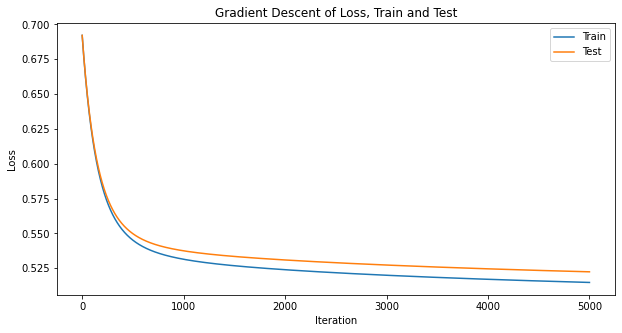

In [16]:
fig = plt.figure(figsize=(10, 5))
axes = fig.add_subplot(111)
axes.plot(loss_train)
axes.plot(loss_test)
axes.set_xlabel("Iteration")
axes.set_ylabel("Loss")
axes.legend(["Train", "Test"])
plt.title("Gradient Descent of Loss, Train and Test")
plt.show()

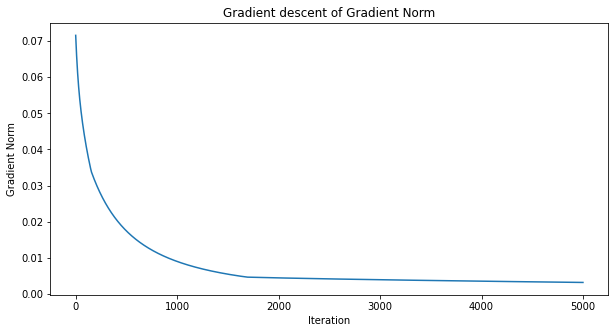

In [19]:
grad_desc_viz(grad_train, ylabel = "Gradient Norm", title="Gradient descent of Gradient Norm")